In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing "Movies" Dataframe


In [2]:
movies = pd.read_csv('/Users/omaralamri/Desktop/ml-25m/movies.csv', sep=',')
movies.shape

(62423, 3)

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Clean the Data

### 1. Extract year from title

In [4]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*',expand = True)
print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  
1                   Adventure|Children|Fantasy  1995  
2                               Comedy|Romance  1995  
3                         Comedy|Drama|Romance  1995  
4                                       Comedy  1995  


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 4 columns):
movieId    62423 non-null int64
title      62423 non-null object
genres     62423 non-null object
year       62016 non-null object
dtypes: int64(1), object(3)
memory usage: 1.9+ MB


### 2. Convert ' year ' column to a numeric datatybe

In [6]:
movies['year'] = pd.to_numeric(movies['year'],errors='coerce',downcast='float')

### 3. Drop any null or dublicated values

In [7]:
movies.drop_duplicates(inplace=True)
movies.dropna(inplace=True)
movies.isnull().any()

movieId    False
title      False
genres     False
year       False
dtype: bool

In [8]:
nan_df = movies[movies.isna().any(axis=1)]
nan_df.head()

,movieId,title,genres,year


# General Analysis

### What is the minimum and maximum year?

In [9]:
Years = movies['year'].unique().tolist()
print(min(Years), '-', max(Years))

1874.0 - 2019.0


### Total number of Years

In [10]:
print(len(Years))

135


### Total number of Movies


In [11]:
titles = movies['title'].unique().tolist()
print(len(titles))

61913


### Total number of Movies per Genre


In [12]:
genre_count = movies['genres'].str.split('|', expand=True).stack().value_counts()
genre_count

Drama                 25558
Comedy                16843
Thriller               8631
Romance                7708
Action                 7335
Horror                 5970
Documentary            5561
Crime                  5314
(no genres listed)     4798
Adventure              4136
Sci-Fi                 3583
Children               2930
Animation              2927
Mystery                2921
Fantasy                2724
War                    1874
Western                1399
Musical                1053
Film-Noir               353
IMAX                    195
dtype: int64

### Importing "Ratings" Dataframe


In [13]:
rating = pd.read_csv('/Users/omaralamri/Desktop/ml-25m/ratings.csv')
del rating['timestamp']
print (rating.tail(4))


          userId  movieId  rating
25000091  162541    55768     2.5
25000092  162541    56176     2.0
25000093  162541    58559     4.0
25000094  162541    63876     5.0


In [14]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 3 columns):
userId     int64
movieId    int64
rating     float64
dtypes: float64(1), int64(2)
memory usage: 572.2 MB


## Merge Movies dataframe and Rating Datafram

In [15]:
avg_ratings = rating.groupby('movieId', as_index = False).mean()
box_office = movies.merge(avg_ratings, on = 'movieId', how = 'inner')
print(box_office.head(5))

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres    year        userId    rating  
0  Adventure|Animation|Children|Comedy|Fantasy  1995.0  81294.564728  3.893708  
1                   Adventure|Children|Fantasy  1995.0  81358.542554  3.251527  
2                               Comedy|Romance  1995.0  81343.694934  3.142028  
3                         Comedy|Drama|Romance  1995.0  81266.193024  2.853547  
4                                       Comedy  1995.0  81002.872460  3.058434  


## Analysis on 'Animation' Movies

### How many "Animation" movies have been released between the years 1995 - 2015?

In [16]:
between1995_2015 = movies['year'].between(1995, 2015)
is_Animation = movies['genres'].str.contains('Animation')
print('Total number of "Animation" movies between the years 1995-2015: ')
print(len(movies[between1995_2015 & is_Animation]))
movies[between1995_2015 & is_Animation].head()

Total number of "Animation" movies between the years 1995-2015: 
1364


,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
12,13,Balto (1995),Adventure|Animation|Children,1995.0
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance,1995.0
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance,1995.0
241,244,Gumby: The Movie (1995),Animation|Children,1995.0


### Store movies by genre

In [17]:
movies['Drama'] = movies['genres'].str.contains('Drama')
movies['Comedy'] = movies['genres'].str.contains('Comedy')
movies['Thriller'] = movies['genres'].str.contains('Thriller')
movies['Romance'] = movies['genres'].str.contains('Romance')
movies['Animation'] = movies['genres'].str.contains('Animation')

### Group all movies by year

In [18]:
by_year = movies.groupby("year",as_index=False).sum()
by_year = by_year[-25:-1]

### The production rate of Animation movies between the years 1995 - 2015:

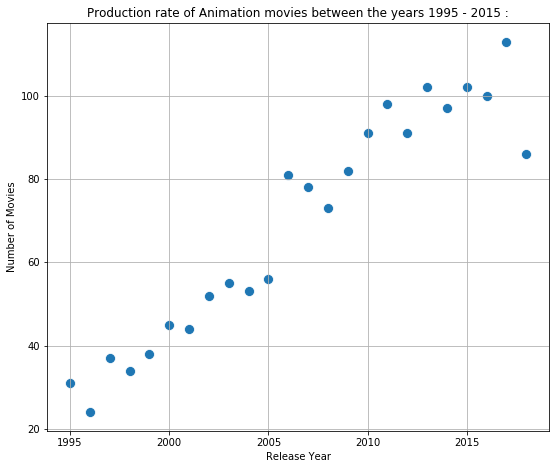

In [19]:
plt.figure(figsize=(9, 7.5))
sns.scatterplot(by_year['year'], by_year['Animation'], s=100);
plt.grid(True)

plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title("Production rate of Animation movies between the years 1995 - 2015 :");


### Animation movies production rate compared to other genres:

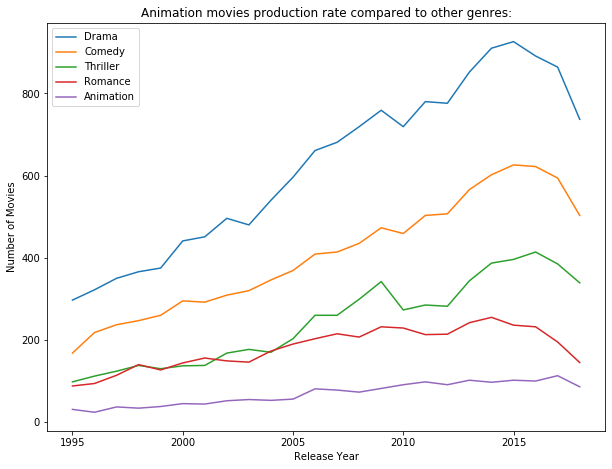

In [20]:

plt.figure(figsize=(10, 7.5))

plt.plot(by_year['year'], by_year['Drama'], label='Drama')
plt.plot(by_year['year'], by_year['Comedy'], label='Comedy')
plt.plot(by_year['year'], by_year['Thriller'], label='Thriller')
plt.plot(by_year['year'], by_year['Romance'], label='Romance')
plt.plot(by_year['year'], by_year['Animation'], label='Animation')


plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title("Animation movies production rate compared to other genres:")
plt.legend();


### Rating of "Animation" movies:

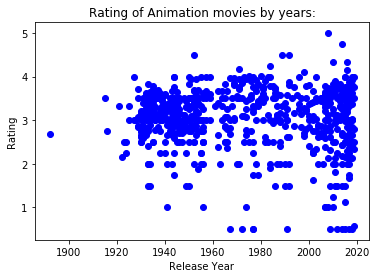

In [21]:

Animation_movies = box_office [(box_office.genres == 'Animation')]
plt.scatter(Animation_movies['year'], Animation_movies['rating'], color = 'blue');

plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.title("Rating of Animation movies by years:");

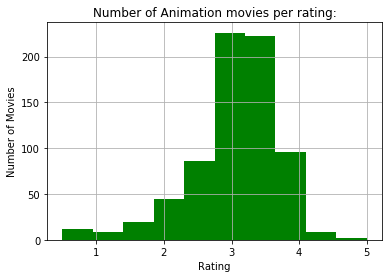

In [22]:
plt.hist(Animation_movies['rating'], 10, density=False, facecolor='green')
plt.grid(True)

plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title("Number of Animation movies per rating:");

### How many High rated "Animation" movies?


In [23]:
# Animation movies with rating more than '4'

is_High = box_office [(box_office.genres == 'Animation') & (box_office.rating > 4)]
print('Total number of High rated "Animation" movies:')
print(len(is_High))
is_High


Total number of High rated "Animation" movies:
13


,movieId,title,genres,year,userId,rating
25719,126090,Hedgehog in the Fog (1975),Animation,1975.0,84017.131387,4.007299
38171,159632,Mr. Dough and the Egg Princess (2010),Animation,2010.0,82292.666667,4.333333
38584,160718,Piper (2016),Animation,2016.0,82803.988655,4.140194
41867,168870,Lucky and Zorba (1998),Animation,1998.0,88965.000000,4.100000
41930,169022,Classmates (2016),Animation,2016.0,71799.750000,4.333333
43525,172587,Vacations in Prostokvashino (1980),Animation,1980.0,83153.491228,4.008772
44155,173919,Legend of the Galactic Heroes: Golden Wings (1...,Animation,1992.0,134854.500000,4.500000
46540,179425,Dashavatar - Every era has a hero (2008),Animation,2008.0,98669.000000,5.000000
49827,187049,Manieggs - Revenge of the Hard Egg (2014),Animation,2014.0,64573.000000,4.750000
50306,188091,Аргонавты (1971),Animation,1971.0,64117.166667,4.166667
